<a href="https://colab.research.google.com/github/stratoskar/Path-Based-Traffic-Flow-Prediction/blob/main/Python_Code/3_Data_Exploration_and_Time_Series_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Dataframe libraries
import numpy as np
import polars as pl
import pandas as pd

# Import libraries to draw graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Library to cast datetime data
from datetime import timedelta

# Import random module
import random

# Access google drive files
from google.colab import drive

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Access google drive location
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read dataframe with the data
all_data = pl.read_csv('/content/drive/MyDrive/Paper/Map_Matched_Data/interpolated_data.csv',try_parse_dates=True)

In this research, we assume that **the road network is a hybrid graph G = (V,E)** with simple and directed edges.

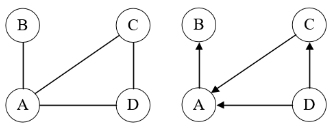

In this graph, V is the **set of vertices** and E is the **set of Edges**.

Each vertice in the graph represents an intersection of the road network, while each edge represents a road segment between two intersections.

**From now on, we define as edge every road segment.**

In [5]:
# Check if there are duplicate values in the dataset
print(f'Dataframe shape before drop duplicate rows: {all_data.shape}')
print(f'Dataframe shape after drop duplicate rows: {all_data.unique().shape}')

Dataframe shape before drop duplicate rows: (67143876, 8)
Dataframe shape after drop duplicate rows: (67143825, 8)


Based on the output above, there are duplicate rows in the dataset that need to be removed:

In [6]:
# Remove duplicate rows
all_data = all_data.unique(keep='first')

In [7]:
# Sort values in dataframe
all_data = all_data.sort(['taxi_id','traj_id','expected_start_time','expected_end_time'])

In [8]:
# Print first 5 rows of the dataset
all_data.head(5)

taxi_id,traj_id,osm_way_id,edge_length,edge_speed,road_class,expected_start_time,expected_end_time
i64,i64,i64,f64,i64,str,datetime[μs],datetime[μs]
0,0,48582250,0.266,89,"""motorway""",2008-05-17 10:00:29,2008-05-17 10:00:39.579545
0,0,513702094,0.063,89,"""motorway""",2008-05-17 10:00:39.579545,2008-05-17 10:00:42.085227
0,0,513702093,0.12,89,"""motorway""",2008-05-17 10:00:42.085227,2008-05-17 10:00:46.857954
0,0,23925280,0.077,89,"""motorway""",2008-05-17 10:00:46.857954,2008-05-17 10:00:49.920454
0,0,27652284,0.224,89,"""motorway""",2008-05-17 10:00:49.920454,2008-05-17 10:00:58.829545


**There are several columns inside the dataset. Each column stores a specific information.**

**taxi_id** and **traj_id** columns define together a trajectory of a
taxi.

**osm_way_id** column contains the edges that a specific trajecotry crossed.

**edge_length** column contains information about the length (in Km) of the specific edge.

**edge_speed** column contains information about the maximum speed limit inside this specific edge.

**road_class** column contains information about the type of this edge.

**expected_start_time** and **expected_end_time** share information about what time a taxi inserted and exited a specific edge.





In [9]:
# Convert polars dataframe into a pandas dataframe
all_data = all_data.to_pandas()

In [10]:
# Select only data from May
all_data = all_data[(all_data['expected_start_time'] >= "2008-05-01 00:00:00") & (all_data['expected_end_time'] <= "2008-05-30 00:00:00")]

In [11]:
# Print data
all_data

,taxi_id,traj_id,osm_way_id,edge_length,edge_speed,road_class,expected_start_time,expected_end_time
0,0,0,48582250,0.266,89,motorway,2008-05-17 10:00:29.000000,2008-05-17 10:00:39.579545
1,0,0,513702094,0.063,89,motorway,2008-05-17 10:00:39.579545,2008-05-17 10:00:42.085227
2,0,0,513702093,0.120,89,motorway,2008-05-17 10:00:42.085227,2008-05-17 10:00:46.857954
3,0,0,23925280,0.077,89,motorway,2008-05-17 10:00:46.857954,2008-05-17 10:00:49.920454
4,0,0,27652284,0.224,89,motorway,2008-05-17 10:00:49.920454,2008-05-17 10:00:58.829545
...,...,...,...,...,...,...,...,...
67092344,536,294,681667027,0.023,32,unclassified,2008-05-29 23:30:30.958616,2008-05-29 23:30:32.444680
67092345,536,294,681667027,0.188,32,unclassified,2008-05-29 23:30:32.444680,2008-05-29 23:30:44.591639
67092346,536,294,512275694,0.131,32,unclassified,2008-05-29 23:30:44.591639,2008-05-29 23:30:53.055744
67092347,536,294,739695570,0.064,35,unclassified,2008-05-29 23:30:53.055744,2008-05-29 23:30:57.190879


In [12]:
# Show what type (and how many) of edges are present in the dataset
all_data['road_class'].value_counts()

secondary        12813331
tertiary          8514215
primary           4892033
residential       3961251
motorway          2330830
trunk             1170306
service_other      938922
unclassified       644512
Name: road_class, dtype: int64

There are meny edges of type '**secondary**' in the dataset.
Also, there are many edges that are considered **unclassified**.
This column gives us valueable information, but not the full truth
about the edge types.

In [13]:
# How many trajectories are present in the dataset?
number_of_trajectories = all_data.loc[:, ['taxi_id', 'traj_id']].drop_duplicates().shape[0]
print(f'There are {number_of_trajectories} trajectories present in the dataset.')

There are 263109 trajectories present in the dataset.


In [14]:
# Delete trajectories, which contain only one OSM Way ID record, and thus they are useless for our research
uniques = all_data.loc[:, ['taxi_id', 'traj_id']].drop_duplicates(keep=False).index
all_data.drop(uniques,axis=0,inplace=True)
all_data.reset_index(drop=True,inplace=True)
all_data = all_data.reset_index(drop=True)

In [15]:
# Print the shape of the dataset after deleting trajectories with only one record
print(f'The shape of the dataset after deletion is: {all_data.shape}')

The shape of the dataset after deletion is: (35265392, 8)


In [16]:
# Check if there are missing values in the dataset
all_data.isna().sum()

taxi_id                0
traj_id                0
osm_way_id             0
edge_length            0
edge_speed             0
road_class             0
expected_start_time    0
expected_end_time      0
dtype: int64

There are no missing values in the dataset.

In [17]:
# Show data types in the dataset
all_data.dtypes

taxi_id                         int64
traj_id                         int64
osm_way_id                      int64
edge_length                   float64
edge_speed                      int64
road_class                     object
expected_start_time    datetime64[ns]
expected_end_time      datetime64[ns]
dtype: object

In [18]:
# Print dataset
all_data.head()

,taxi_id,traj_id,osm_way_id,edge_length,edge_speed,road_class,expected_start_time,expected_end_time
0,0,0,48582250,0.266,89,motorway,2008-05-17 10:00:29.000000,2008-05-17 10:00:39.579545
1,0,0,513702094,0.063,89,motorway,2008-05-17 10:00:39.579545,2008-05-17 10:00:42.085227
2,0,0,513702093,0.120,89,motorway,2008-05-17 10:00:42.085227,2008-05-17 10:00:46.857954
3,0,0,23925280,0.077,89,motorway,2008-05-17 10:00:46.857954,2008-05-17 10:00:49.920454
4,0,0,27652284,0.224,89,motorway,2008-05-17 10:00:49.920454,2008-05-17 10:00:58.829545


In [19]:
# Find max and min timestamp that is present in the dataset
min_timestamp = all_data['expected_start_time'].min()
print("Min timestamp value that is present in the dataset is: ",min_timestamp)

max_timestamp = all_data['expected_end_time'].max()
print("Max timestamp value that is present in the dataset is: ",max_timestamp)

# Calculate total seconds between max and min value
total_sec = (max_timestamp-min_timestamp).total_seconds()
print(f"\nTotal duration of the recordings in this dataset is {total_sec/3600} hours")

Min timestamp value that is present in the dataset is:  2008-05-17 10:00:04
Max timestamp value that is present in the dataset is:  2008-05-29 23:59:59.993125

Total duration of the recordings in this dataset is 301.9988869791667 hours


In [20]:
# This list contains the time intervals that will be used for the time series data
# Each time interval has a duration of 30 minutes.
time_info = []

# Initialize a counter
i = 0

# Iterate until the maximum timestamp is reached
while(True):

    # If it's the first iteration, append the minimum timestamp
    if i == 0:
        time_info.append(min_timestamp)
    else:
        # Append the next timestamp by adding 30 minutes (1800 seconds) to the previous timestamp
        time_info.append(time_info[i-1] + timedelta(seconds=1800))

    # Check if the current timestamp is greater than or equal to the maximum timestamp
    if (time_info[i] >= max_timestamp):
        # Break out of the loop if the condition is met
        break

    # Increment the counter
    i += 1

# Create pairs of consecutive values of the list time_info
time_intervals = list(zip(*[time_info[i:] for i in range(2)]))

In [21]:
# Print the generated time intervals
time_intervals

[(Timestamp('2008-05-17 10:00:04'), Timestamp('2008-05-17 10:30:04')),
 (Timestamp('2008-05-17 10:30:04'), Timestamp('2008-05-17 11:00:04')),
 (Timestamp('2008-05-17 11:00:04'), Timestamp('2008-05-17 11:30:04')),
 (Timestamp('2008-05-17 11:30:04'), Timestamp('2008-05-17 12:00:04')),
 (Timestamp('2008-05-17 12:00:04'), Timestamp('2008-05-17 12:30:04')),
 (Timestamp('2008-05-17 12:30:04'), Timestamp('2008-05-17 13:00:04')),
 (Timestamp('2008-05-17 13:00:04'), Timestamp('2008-05-17 13:30:04')),
 (Timestamp('2008-05-17 13:30:04'), Timestamp('2008-05-17 14:00:04')),
 (Timestamp('2008-05-17 14:00:04'), Timestamp('2008-05-17 14:30:04')),
 (Timestamp('2008-05-17 14:30:04'), Timestamp('2008-05-17 15:00:04')),
 (Timestamp('2008-05-17 15:00:04'), Timestamp('2008-05-17 15:30:04')),
 (Timestamp('2008-05-17 15:30:04'), Timestamp('2008-05-17 16:00:04')),
 (Timestamp('2008-05-17 16:00:04'), Timestamp('2008-05-17 16:30:04')),
 (Timestamp('2008-05-17 16:30:04'), Timestamp('2008-05-17 17:00:04')),
 (Time

**Generate random unique paths of random lengths**

Assuming that we have a road network represented as a graph G=(V,E), as presented in the image below.

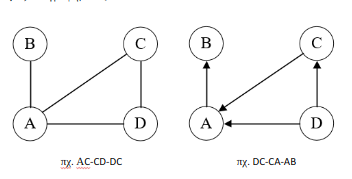

A path is a set of two or more concequtive edges e, so that e belongs to set E. For example, in the image, the path AC -> CD -> DC is a legal path, according to this definition.

In this research, each path can be of any length between 2 and 20. The number of consecutive edges contained in the path defines it's length. The code below uses the dataset's data to generate the unique paths.

In [22]:
# Empty dataframe, in which all the unique paths will be saved
paths = pd.DataFrame(columns=['taxi_id','traj_id','path','length'])

# Define the length options
length_options = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# This list is used, in order to be sure that paths created are unique
check = []

# Legal indexes in which algorithm can search for paths
indexes = np.arange(all_data.shape[0]-max(length_options)+1)

i = 0

# Number of paths to be created
n = 1000

while (paths.shape[0] < n):

    # This list will save the path created
    p = []

    # Select randomly an index
    selected_index = random.choice(indexes)

    # The length of the new path to be created
    selected_length = random.choice(length_options)

    # check if path is within the same trajectory
    if ((all_data.at[selected_index,'taxi_id'] == all_data.at[selected_index+(selected_length-1),'taxi_id']) &
        (all_data.at[selected_index,'traj_id'] == all_data.at[selected_index+(selected_length-1),'traj_id'])):

        # Iterate to the data and extract the consequtive
        # [selected_index...index+selected_length] osm_way_ids
        for y in range(selected_length):
            p.append(int(all_data.at[selected_index+y,'osm_way_id']))

        # If path is unique, then add it to paths dataframe
        if p not in check:
            check.append(p)

            paths.at[i,'taxi_id'] = all_data.at[selected_index,'taxi_id']
            paths.at[i,'traj_id'] = all_data.at[selected_index,'traj_id']

            # Add the new path to the dataframe
            paths.at[i,'path'] = p
            paths.at[i,'length'] = selected_length
            i += 1
        else:
            continue

In [23]:
# Print some paths that where generated
paths.head(10)

,taxi_id,traj_id,path,length
0,426,1539,"[88597575, 417101708, 417101708, 620169771, 62...",7
1,372,160,"[714016923, 713758735, 713758735, 713758728, 7...",19
2,262,190,"[1047613705, 1047613705, 527829987, 527829987,...",6
3,142,511,"[144346316, 144346316, 144346316]",3
4,181,484,"[734004334, 734004334, 734004334, 734004334, 7...",6
5,183,9,"[1120144354, 1120144354, 502795941, 502795941,...",15
6,506,351,"[706549350, 706549350, 706549350, 706549350]",4
7,36,279,"[254984072, 8917679, 161625023, 161625023, 161...",15
8,45,32,"[1071595560, 527857394, 527857394, 1168919629,...",14
9,69,232,"[417101715, 766116624, 766116624, 133733590, 7...",18


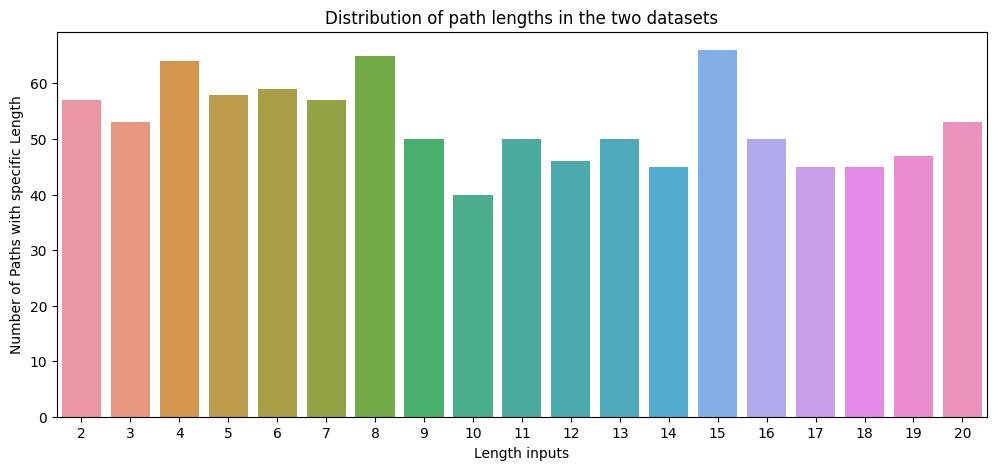

In [24]:
# Count the number of paths grouped by length attribute
plt.figure(figsize=(12,5))
sns.countplot(paths,x='length')
plt.xlabel('Length inputs')
plt.ylabel('Number of Paths with specific Length')
plt.title('Distribution of path lengths in the two datasets')
plt.show()

Based on the graph above, we observe that there is a uniform distribution of paths lengths in the generated paths.

**Create the SPQ function**

In [25]:
def SPQ(path, time_enter, time_leave):
    """
    Find trajectories in the examined data that follow a specific path within a given time interval.

    Parameters:
    - path (list): List of osm_way_ids representing the desired path.
    - time_enter (datetime): Start time of the desired time interval.
    - time_leave (datetime): End time of the desired time interval.
    - examined_data (DataFrame): DataFrame containing the examined data.

    Returns:
    int: Number of unique trajectories that match the specified criteria.
    """

    # Length of the path given to the function
    path_length = len(path)

    # This list will save temporarily the trajectories that match the SPQ condition
    trajectories = []

    # Find all the indexes where the first edge in the path is located
    needed_indexes = examined_data[examined_data['osm_way_id'] == path[0]].index

    # Iterate through all indexes (note the Taxi_ID and Traj_ID numbers)
    for index in needed_indexes:
        traj_id = examined_data.at[index, 'traj_id']
        taxi_id = examined_data.at[index, 'taxi_id']
        inter = 1

        # Decide if the row in the next index matches the criteria
        for i in range(1, path_length):
            try:
                if not ((examined_data['osm_way_id'].iloc[index + i] == path[i])
                        & (examined_data['traj_id'].iloc[index + i] == traj_id)
                        & (examined_data['taxi_id'].iloc[index + i] == taxi_id)):
                    break

                inter += 1  # If the criteria match, then increase inter counter by one

            except IndexError:
                pass  # Index out of bounds exception (do nothing)

        # If the criteria match as many times as the length of the path, then we found one trajectory
        if path_length == inter:
            trajectories.append((taxi_id, traj_id))  # Add this trajectory to the trajectories list

    # Return the number of unique trajectories that match the criteria
    return len(set(trajectories))

In [26]:
# Create an empty dataframe to store SPQ timeseries (number of taxis that crossed a path at a certain time interval)
traffic_flow_SPQ = pd.DataFrame(columns=time_intervals)

# Fill the time series dataset
traffic_flow_SPQ.insert(0,'taxi_id',0)
traffic_flow_SPQ.insert(1,'traj_id',0)
traffic_flow_SPQ.insert(2,'path',0)
traffic_flow_SPQ.insert(3,'length',0)

traffic_flow_SPQ['path'] = paths['path']
traffic_flow_SPQ['length'] = paths['length']
traffic_flow_SPQ['taxi_id'] = paths['taxi_id']
traffic_flow_SPQ['traj_id'] = paths['traj_id']

Fill the dataframes column by column

In [27]:
# Fill the DataFrame column by column
for time in time_intervals:
    i = 0

    # Extract data for the current time interval
    examined_data = all_data[(all_data['expected_start_time'] >= time[0]) & (all_data['expected_end_time'] <= time[1])].reset_index(drop=True)

    # Iterate over paths in the 'paths' DataFrame
    for path in paths['path'].to_list():
        # Call the SPQ function and fill the DataFrame
        traffic_flow_SPQ.at[i, time] = SPQ(path, time[0], time[1])
        i += 1  # Move to the next row in the DataFrame

In [28]:
# Print the dataframe with SPQ traffic flow information
traffic_flow_SPQ

,taxi_id,traj_id,path,length,"(2008-05-17 10:00:04, 2008-05-17 10:30:04)","(2008-05-17 10:30:04, 2008-05-17 11:00:04)","(2008-05-17 11:00:04, 2008-05-17 11:30:04)","(2008-05-17 11:30:04, 2008-05-17 12:00:04)","(2008-05-17 12:00:04, 2008-05-17 12:30:04)","(2008-05-17 12:30:04, 2008-05-17 13:00:04)",...,"(2008-05-29 19:00:04, 2008-05-29 19:30:04)","(2008-05-29 19:30:04, 2008-05-29 20:00:04)","(2008-05-29 20:00:04, 2008-05-29 20:30:04)","(2008-05-29 20:30:04, 2008-05-29 21:00:04)","(2008-05-29 21:00:04, 2008-05-29 21:30:04)","(2008-05-29 21:30:04, 2008-05-29 22:00:04)","(2008-05-29 22:00:04, 2008-05-29 22:30:04)","(2008-05-29 22:30:04, 2008-05-29 23:00:04)","(2008-05-29 23:00:04, 2008-05-29 23:30:04)","(2008-05-29 23:30:04, 2008-05-30 00:00:04)"
0,426,1539,"[88597575, 417101708, 417101708, 620169771, 62...",7,1,1,0,0,1,1,...,9,8,8,8,12,8,5,4,3,5
1,372,160,"[714016923, 713758735, 713758735, 713758728, 7...",19,3,1,2,0,0,2,...,1,1,1,1,1,2,3,2,0,1
2,262,190,"[1047613705, 1047613705, 527829987, 527829987,...",6,6,5,5,1,2,4,...,1,4,4,4,7,5,3,0,3,5
3,142,511,"[144346316, 144346316, 144346316]",3,13,10,9,9,4,4,...,25,26,35,28,25,19,25,15,17,18
4,181,484,"[734004334, 734004334, 734004334, 734004334, 7...",6,0,0,1,0,0,0,...,2,2,2,2,3,1,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,324,286,"[254758118, 254758118, 254758118, 254758118, 2...",8,7,7,9,13,13,22,...,5,5,4,5,3,7,8,9,6,5
996,6,358,"[254758114, 254758114, 254758114, 254758114]",4,12,7,6,11,5,1,...,16,21,15,18,20,13,18,14,17,8
997,324,34,"[682515406, 417396747, 417396747, 681699528, 6...",18,0,0,0,0,0,0,...,1,4,1,2,3,3,1,2,2,5
998,321,675,"[254396707, 254396707, 585655707, 585655708, 5...",15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Save dataframe
traffic_flow_SPQ.to_csv('/content/drive/My Drive/Thesis/traffic_flow_SPQ.csv',index=False)

**Fill the second time series dataframe without using the SPQ rules**

In [30]:
def no_SPQ(path, time_enter, time_leave):
    '''
    Calculate traffic flow at each path as the number of trajectories that have crossed,
    at least one time, all the edges of the given path at a given time interval.

    Parameters:
      path (list): The path that the trajectories should follow.
      time_enter (float): The time, in which the trajectory should enter the first edge of the path given as input.
      time_leave (float): The time, in which the trajectory should leave the last edge of the path given as input.

    Returns:
      int: The number of trajectories that passed through this path at the given time interval.
      float: The mean crossing time of every Yellow Taxi at the given time interval.
    '''
    # Initialize the count of matching trajectories
    trajectories = 0

    # Find the indexes of entries in 'examined_data' where
    # the first element of the 'path' is present in the 'osm_way_id' column
    needed_indexes = examined_data[examined_data['osm_way_id'] == path[0]].index

    # Convert the 'path' list to a set for efficient subset check
    path_roads = set(path)

    # Loop through the needed indexes to check for matching trajectories
    for index in needed_indexes:
        # Get the 'traj_id' and 'taxi_id' for the current index
        traj_id = examined_data.at[index, 'traj_id']
        taxi_id = examined_data.at[index, 'taxi_id']

        # Find all the 'osm_way_id' values for the current 'traj_id' and 'taxi_id' and store them into a set
        selected_roads = set(examined_data[(examined_data['traj_id'] == traj_id) & (examined_data['taxi_id'] == taxi_id)]['osm_way_id'])

        # Check if the 'path_roads' is a subset of 'selected_roads'
        if path_roads.issubset(selected_roads):
            # Increment the count of matching trajectories
            trajectories += 1

    return trajectories

In [31]:
# Create an empty dataframe to store the time series without the SPQ information
traffic_flow_without_SPQ = pd.DataFrame(columns=time_intervals)

# Fill the time series dataset
traffic_flow_without_SPQ.insert(0,'taxi_id',0)
traffic_flow_without_SPQ.insert(1,'traj_id',0)
traffic_flow_without_SPQ.insert(2,'path',0)
traffic_flow_without_SPQ.insert(3,'length',0)

traffic_flow_without_SPQ['path'] = paths.iloc[0:100]['path']
traffic_flow_without_SPQ['length'] = paths['length']
traffic_flow_without_SPQ['taxi_id'] = paths['taxi_id']
traffic_flow_without_SPQ['traj_id'] = paths['traj_id']

Fill the dataframe column by column

In [32]:
# For each time interval of 30-minutes, do the following:
for time in time_intervals:
    # Initialize a counter for indexing results in timeseries
    i = 0
    # Use only the necessary data within the current time interval
    examined_data = all_data[(all_data['expected_start_time'] >= time[0]) & (all_data['expected_end_time'] <= time[1])].reset_index(drop=True)

    # For each path, do the following:
    for path in paths.iloc[0:100]['path'].to_list():

        # Calculate the number of trajectories and mean crossing time using the no_SPQ function
        # Update the timeseries with the calculated values
        traffic_flow_without_SPQ.at[i, time] = no_SPQ(path, time[0], time[1])

        # Increment the index counter
        i += 1

    # Print the current time interval for progress tracking
    print(time)

(Timestamp('2008-05-17 10:00:04'), Timestamp('2008-05-17 10:30:04'))
(Timestamp('2008-05-17 10:30:04'), Timestamp('2008-05-17 11:00:04'))
(Timestamp('2008-05-17 11:00:04'), Timestamp('2008-05-17 11:30:04'))
(Timestamp('2008-05-17 11:30:04'), Timestamp('2008-05-17 12:00:04'))
(Timestamp('2008-05-17 12:00:04'), Timestamp('2008-05-17 12:30:04'))
(Timestamp('2008-05-17 12:30:04'), Timestamp('2008-05-17 13:00:04'))
(Timestamp('2008-05-17 13:00:04'), Timestamp('2008-05-17 13:30:04'))
(Timestamp('2008-05-17 13:30:04'), Timestamp('2008-05-17 14:00:04'))
(Timestamp('2008-05-17 14:00:04'), Timestamp('2008-05-17 14:30:04'))
(Timestamp('2008-05-17 14:30:04'), Timestamp('2008-05-17 15:00:04'))
(Timestamp('2008-05-17 15:00:04'), Timestamp('2008-05-17 15:30:04'))
(Timestamp('2008-05-17 15:30:04'), Timestamp('2008-05-17 16:00:04'))
(Timestamp('2008-05-17 16:00:04'), Timestamp('2008-05-17 16:30:04'))
(Timestamp('2008-05-17 16:30:04'), Timestamp('2008-05-17 17:00:04'))
(Timestamp('2008-05-17 17:00:04'),

In [33]:
# Print the dataframe without the SPQ traffic flow information
traffic_flow_without_SPQ

,taxi_id,traj_id,path,length,"(2008-05-17 10:00:04, 2008-05-17 10:30:04)","(2008-05-17 10:30:04, 2008-05-17 11:00:04)","(2008-05-17 11:00:04, 2008-05-17 11:30:04)","(2008-05-17 11:30:04, 2008-05-17 12:00:04)","(2008-05-17 12:00:04, 2008-05-17 12:30:04)","(2008-05-17 12:30:04, 2008-05-17 13:00:04)",...,"(2008-05-29 19:00:04, 2008-05-29 19:30:04)","(2008-05-29 19:30:04, 2008-05-29 20:00:04)","(2008-05-29 20:00:04, 2008-05-29 20:30:04)","(2008-05-29 20:30:04, 2008-05-29 21:00:04)","(2008-05-29 21:00:04, 2008-05-29 21:30:04)","(2008-05-29 21:30:04, 2008-05-29 22:00:04)","(2008-05-29 22:00:04, 2008-05-29 22:30:04)","(2008-05-29 22:30:04, 2008-05-29 23:00:04)","(2008-05-29 23:00:04, 2008-05-29 23:30:04)","(2008-05-29 23:30:04, 2008-05-30 00:00:04)"
0,426,1539,"[88597575, 417101708, 417101708, 620169771, 62...",7,2,2,0,0,2,2,...,42,36,29,28,40,41,28,27,16,18
1,372,160,"[714016923, 713758735, 713758735, 713758728, 7...",19,4,1,2,0,0,3,...,2,1,1,2,1,2,3,2,0,1
2,262,190,"[1047613705, 1047613705, 527829987, 527829987,...",6,12,10,10,2,4,12,...,4,10,8,8,16,10,6,0,8,12
3,142,511,"[144346316, 144346316, 144346316]",3,110,106,95,90,33,52,...,289,263,407,287,266,164,278,182,184,185
4,181,484,"[734004334, 734004334, 734004334, 734004334, 7...",6,0,0,11,0,0,0,...,26,21,43,30,44,15,4,23,45,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,198,416,"[777343790, 225806055, 934194966, 934194966]",4,42,17,20,33,20,49,...,42,52,50,52,56,42,37,24,20,28
96,328,555,"[191297197, 191297197, 191297197, 437761157, 4...",20,0,0,0,14,14,0,...,0,0,0,14,0,0,8,0,0,8
97,305,41,"[286003244, 286003244, 286003244, 286003244, 2...",18,0,0,0,12,12,12,...,37,79,24,80,50,106,95,47,60,26
98,46,306,"[792350776, 408572570, 359898521, 359898521, 3...",10,0,1,2,0,1,1,...,6,6,10,8,9,11,10,5,5,4


In [34]:
# Save timeseries to CSV
traffic_flow_without_SPQ.to_csv('/content/drive/My Drive/Thesis/traffic_flow_without_SPQ.csv',index=False)

The output code files will be used in next code files!